In [16]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [17]:
eph_final = pd.read_csv("EPH")

# Limpieza para un correcto uso de la base de datso

In [18]:
eph_final.fillna(0, inplace= True) #Borramos los Nan
eph_final = eph_final[eph_final["ESTADO"]==1]  #Filtramos el df para que sean sujetos ocupados
maximo = float(eph_final["P47T"].quantile(0.99))
eph_final = eph_final[(eph_final["P47T"] <= maximo) & (eph_final["P47T"]>1)] #Volvemos a filtrar el df para sacar outliers (estableciendo como maximo datos menos al 0.99 quantile) y datos de gente con ingresos menores a 1
eph_final = eph_final[eph_final["PP3E_TOT"]>0] #Filtramos nuevamente para trabajar con gente que trabaja, al menos, 1 hora por mes
eph_final

,Unnamed: 0,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,...,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF,V2_M,V5_M,V11_M,V21_M
3,3,TQRMNOSQTHMKLQCDEHPJB00872830,2024,4,1,1,1,40,S,29,...,9.00,10.00,9.00,0.00,9.00,10.00,0.00,0.00,0.00,0.00
4,4,TQRMNOSQTHMKLQCDEHPJB00872830,2024,4,1,2,1,40,S,29,...,9.00,10.00,9.00,0.00,9.00,10.00,0.00,0.00,0.00,0.00
10,10,TQRMNOQQSHKKPPCDEIJAH00872831,2024,4,1,1,1,1,S,33,...,8.00,8.00,8.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00
11,11,TQRMNOQQSHKKPPCDEIJAH00872831,2024,4,1,2,1,1,S,33,...,8.00,8.00,8.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00
12,12,TQRMNORTSHJKLMCDEHPJB00872828,2024,4,1,1,1,40,S,29,...,8.00,9.00,8.00,0.00,8.00,10.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945913,51625,TQRMNOSSXHLMKUCDEOHCH00651957,2020,1,1,2,1,44,0,91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
945914,51626,TQRMNOQUVHJMLLCDEOHCH00628124,2020,1,1,1,1,44,0,91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
945916,51628,TQRMNOSRWHJKKMCDEOHCH00628127,2020,1,1,1,1,44,0,91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
945917,51629,TQRMNOSRWHJKKMCDEOHCH00628127,2020,1,1,2,1,44,0,91,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Analisis estadistico descriptivo de nuestra variable de importancia

- Aclaracion importante = Los datos vistos en estas tablas, data frames y graficos son NOMINALES

In [19]:
df = eph_final[["ANO4", "TRIMESTRE","P47T", "REGION", "PONDERA"]].copy() #Creamos una copia del DF para hacer un analisis de ingreso promedio ponderado entre las distintas regiones

nombres = ["Año", "Trimestre", "Ingreso Total Individual", "Region", "Pondera"]

df.columns = nombres

df["Region"] = df["Region"].astype(str).str.replace("1","Gran Buenos Aires").replace("40", "Noroeste").replace("41", "Noreste").replace("42","Cuyo").replace("43","Pampeana").replace("44","Patagonia")

df["Region"] = df["Region"].str.replace("4Gran Buenos Aires", "Noreste") 

df["Año"] = df["Año"].astype(int)

info = df.pivot_table(values="Ingreso Total Individual",index ="Año", columns= "Region", aggfunc= lambda x: np.average(x, weights=df.loc[x.index,"Pondera"]))
"""
La funcion implicada en el argumento "aggfunc" intenta recabar los datos poblacionales de cada dato asignandole el peso correspondiente y ponderando los resultados para 

no trabajar con informacion incompleta o estadisticamente no significativa

"""
info 

Region,Cuyo,Gran Buenos Aires,Noreste,Noroeste,Pampeana,Patagonia
Año,,,,,,
2020,30802.29,41129.65,27554.82,28252.69,35339.77,48318.94
2021,42678.84,60159.52,38472.85,38268.86,49322.28,71089.06
2022,71937.86,94492.02,62850.38,64396.35,84407.45,116843.68
2023,162529.16,211078.97,141118.40,141138.77,191935.85,254421.16
2024,430113.96,514980.27,375732.55,385795.94,502379.77,587714.59


In [20]:
info.corr().round(6)

Region,Cuyo,Gran Buenos Aires,Noreste,Noroeste,Pampeana,Patagonia
Region,,,,,,
Cuyo,1.00,1.00,1.00,1.00,1.00,1.00
Gran Buenos Aires,1.00,1.00,1.00,1.00,1.00,1.00
Noreste,1.00,1.00,1.00,1.00,1.00,1.00
Noroeste,1.00,1.00,1.00,1.00,1.00,1.00
Pampeana,1.00,1.00,1.00,1.00,1.00,1.00
Patagonia,1.00,1.00,1.00,1.00,1.00,1.00


# Grafico 

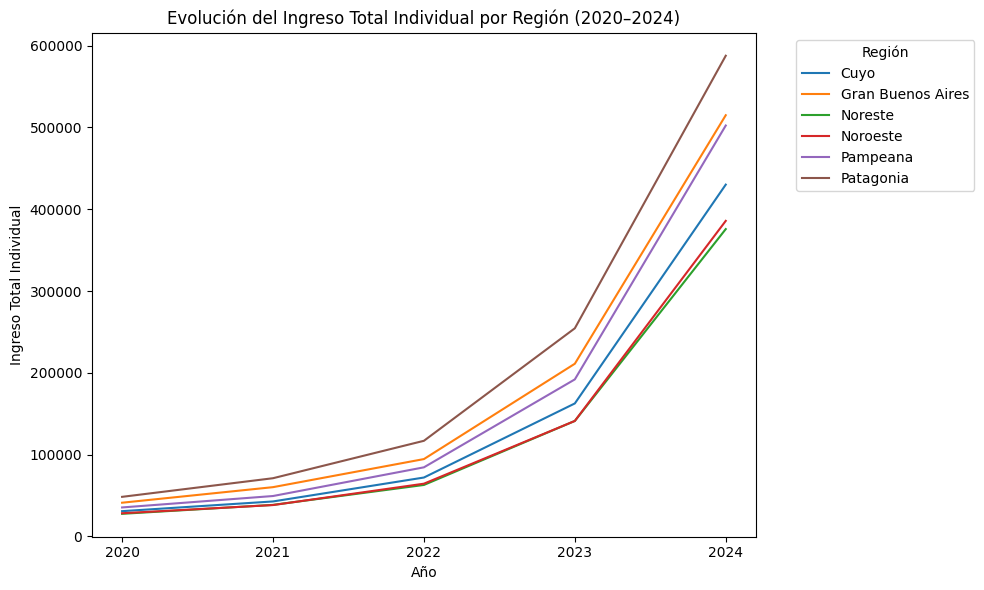

In [21]:
plt.figure(figsize=(10, 6))

for region in info.columns:
    plt.plot(info.index, info[region], label=region)

plt.title("Evolución del Ingreso Total Individual por Región (2020–2024)")
plt.xlabel("Año")
plt.ylabel("Ingreso Total Individual")
plt.xticks(info.index, info.index.astype(int))


plt.legend(title="Región", bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()

plt.show()

# Analisis estadistico inferencial

- Hasta aca hicimos una paneo para entender como evoluciono el ingreso de cada region dentro de estos 4 años de datos, a partir del siguiente bloque de codigo nos vamos a concentrar en encontrar los determinantes de ese ingreso para entender las diferencias entre las diferentes partes del pais

In [22]:
eph_final["Log_P47T"] = np.log(eph_final["P47T"])  #Establecemos el ingreso total individual como una variable logaritmica

Y = np.array((eph_final["Log_P47T"])) #Variable explicada

#---------------------------------------------------------------------------

# VARIABLES EXPLICATIVAS

#---------------------------------------------------------------------------

Edad = np.array(eph_final["CH06"]- eph_final["CH06"].mean()).reshape(len(eph_final["CH06"]),1) #Variable explicativa : Edad

Edad2 = np.array(eph_final["CH06"]**2).astype(int).reshape(len(eph_final["CH06"]),1) #Variable explicativa : Edad cuadrada para intentar captar los efectos no lineales de la edad

eph_final["CH04"] = eph_final["CH04"].astype(str).str.replace("2","0")
Genero = np.array(eph_final["CH04"]).astype(int).reshape(len(eph_final["CH04"]),1) #Variable explicativa : Genero 

eph_final["NIVEL_ED"] = eph_final["NIVEL_ED"].apply(lambda x : 1 if x == 6 else 0)

Educacion = np.array(eph_final["NIVEL_ED"]).astype(int).reshape(len(eph_final["NIVEL_ED"]),1) #Variable explicativa : Nivel de educacion 

eph_final["CAT_OCUP"] = eph_final["CAT_OCUP"].apply(lambda x: 1 if x == 3 else 0)

Trabajo = np.array(eph_final["CAT_OCUP"]).reshape(len(eph_final["CAT_OCUP"]),1) #Variable explicativa : Empleo para saber si son empleados o cuentapropistas

eph_final["PP07K"] = eph_final["PP07K"].apply(lambda x: 1 if x == 1 else 0)

Recibo = np.array(eph_final["PP07K"]).reshape(len(eph_final["PP07K"]),1) #Variable explicativa : Recibo de sueldo para saber si los declarados empleados trabajan en blanco

eph_final["Log_PP3E_TOT"] = np.log(eph_final["PP3E_TOT"])

Horas_Trabajadas = np.array(eph_final["Log_PP3E_TOT"]).reshape(len(eph_final["Log_PP3E_TOT"]),1) #Variable explicativa : Cantidad de horas trabajadas declaradas por semana logaritmicas

X = np.hstack((Edad,Edad2,Genero,Educacion,Trabajo,Recibo,Horas_Trabajadas))
X = pd.DataFrame(X)
X. columns = ["Edad", "Edad ** 2", "Genero", "Nivel Educativo","Empleado formal","Recibo de sueldo", "Horas Trabajadas"]
X


,Edad,Edad ** 2,Genero,Nivel Educativo,Empleado formal,Recibo de sueldo,Horas Trabajadas
0,-10.62,900.00,1.00,1.00,1.00,1.00,4.25
1,-10.62,900.00,0.00,1.00,1.00,1.00,3.40
2,-4.62,1296.00,1.00,1.00,1.00,1.00,3.47
3,5.38,2116.00,0.00,0.00,1.00,1.00,3.47
4,3.38,1936.00,0.00,0.00,1.00,1.00,3.00
...,...,...,...,...,...,...,...
305023,13.38,2916.00,0.00,0.00,1.00,1.00,3.69
305024,12.38,2809.00,0.00,0.00,0.00,0.00,3.74
305025,6.38,2209.00,1.00,1.00,1.00,1.00,3.40
305026,1.38,1764.00,0.00,1.00,1.00,1.00,3.53


# Planteamos 2 regresiones distintas donde la diferencia nace en la considerancion del PONDERA

- Regresion de la muestra sobre una muestra (sin PONDERA)

In [23]:
modelo = sm.OLS(Y, sm.add_constant(X) , M=sm.robust.norms.HuberT())
resultado = modelo.fit()
print(resultado.summary(alpha = 0.5))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     8903.
Date:                sáb, 07 jun 2025   Prob (F-statistic):               0.00
Time:                        20:06:15   Log-Likelihood:            -4.6850e+05
No. Observations:              305028   AIC:                         9.370e+05
Df Residuals:                  305020   BIC:                         9.371e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|       [0.25       0.75]
------------------------------------------------------------------------------------
const                9.3228      0.025  

- Regresion sobre datos poblacionales asignando el peso correspondiente a cada observacion (considerando el PONDERA)

In [24]:
ponderadores = eph_final["PONDERA"]
modelo = sm.WLS(Y, sm.add_constant(X), weights=ponderadores, M=sm.robust.norms.HuberT())
resultado = modelo.fit()
print(resultado.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.164
Model:                            WLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     8548.
Date:                sáb, 07 jun 2025   Prob (F-statistic):               0.00
Time:                        20:06:15   Log-Likelihood:            -5.5981e+05
No. Observations:              305028   AIC:                         1.120e+06
Df Residuals:                  305020   BIC:                         1.120e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                9.4596      0.024  

# Trabajando con variables estadisticamentes significativas de forma individual para comprender las brechas de ingresos promedios entre las distintas regiones

In [25]:
eph_final["REGION"] = eph_final["REGION"].astype(str).str.replace("1","Gran Buenos Aires").replace("40", "Noroeste").replace("41", "Noreste").replace("42","Cuyo").replace("43","Pampeana").replace("44","Patagonia")
eph_final["REGION"] = eph_final["REGION"].str.replace("4Gran Buenos Aires", "Noreste")

vista = eph_final.groupby("REGION")["CH04"].value_counts(normalize=True).round(2).reset_index()
vista[vista["CH04"] == "1"].sort_values(by = "proportion", ascending= False)

,REGION,CH04,proportion
4,Noreste,1,0.58
0,Cuyo,1,0.56
6,Noroeste,1,0.56
8,Pampeana,1,0.55
10,Patagonia,1,0.55
2,Gran Buenos Aires,1,0.53


In [26]:
vista1 = eph_final.groupby("REGION")["CAT_OCUP"].value_counts(normalize=True).round(2).reset_index()
vista1[vista1["CAT_OCUP"] == 1].sort_values(by = "proportion", ascending= False)

,REGION,CAT_OCUP,proportion
10,Patagonia,1,0.81
2,Gran Buenos Aires,1,0.76
8,Pampeana,1,0.74
6,Noroeste,1,0.73
0,Cuyo,1,0.72
4,Noreste,1,0.71


In [27]:
vista2 = eph_final.groupby("REGION")["NIVEL_ED"].value_counts(normalize=True).round(2).reset_index()
vista2[vista2["NIVEL_ED"]==1].sort_values(by = "proportion", ascending= False)

,REGION,NIVEL_ED,proportion
3,Gran Buenos Aires,1,0.25
9,Pampeana,1,0.23
1,Cuyo,1,0.21
5,Noreste,1,0.21
7,Noroeste,1,0.20
11,Patagonia,1,0.20


In [28]:
vista3 = eph_final.groupby("REGION")["PP3E_TOT"].apply(lambda x: np.average(x , weights= eph_final.loc[x.index, "PONDERA"])).sort_values(ascending= False).round(2)
vista3

REGION
Patagonia           38.38
Gran Buenos Aires   37.75
Noreste             37.08
Pampeana            35.86
Noroeste            35.12
Cuyo                34.76
Name: PP3E_TOT, dtype: float64

In [29]:
vista4 = eph_final.groupby("REGION")["PP07K"].value_counts(normalize=True).round(2).reset_index()
vista4[vista4["PP07K"] == 1].sort_values(by = "proportion", ascending= False)


,REGION,PP07K,proportion
10,Patagonia,1,0.64
2,Gran Buenos Aires,1,0.52
9,Pampeana,1,0.47
7,Noroeste,1,0.41
5,Noreste,1,0.41
1,Cuyo,1,0.40


## CONCLUSIONES FINALES

- Las variables seleccionadas para explicar el ingreso total individual, respaldadas teóricamente, fueron: **edad**, **edad al cuadrado**, **género**, **condición de actividad** (empleado vs. desocupado), **cantidad de horas trabajadas**, **tipo de empleo** (formal o informal), y **nivel educativo**.

- Los análisis estadísticos muestran que **todas las variables son altamente significativas**, con un efecto positivo sobre el ingreso (excepto la edad al cuadrado, que presenta un coeficiente negativo).

Esto nos permite concluir, entre otras cosas, que:

- A medida que aumenta la edad, también lo hace el ingreso, aunque de forma decreciente (lo que se refleja en el coeficiente negativo de la edad al cuadrado).
- Los hombres, en promedio, perciben ingresos mayores que las mujeres.
- Estar empleado implica mayores ingresos que estar desocupado o ser cuentapropista.
- A mayor cantidad de horas trabajadas, mayor es el ingreso individual.
- Los trabajadores formales perciben mejores remuneraciones que los informales.
- Un mayor nivel educativo (en particular, contar con estudios universitarios completos) se asocia con mayores ingresos.

### Al analizar los niveles de ingreso promedio por región, observamos que, si bien la evolución temporal es similar entre regiones, los **niveles** son diferentes. Esto se explica principalmente por tres variables clave:

  - La proporción de empleados sobre la población.
  - La cantidad media de horas trabajadas.
  - La proporción de empleo formal con recibo de sueldo.

Por ejemplo, en la región **Patagonia**, que encabeza el ranking regional de ingresos, observamos:

- Un 81% de la población está empleada.
- El promedio semanal de horas trabajadas es de 39 horas.
- Dentro de ese 81%, un 64% trabaja en el sistema formal con recibo de sueldo.

- Aunque otras variables como el género y el nivel educativo también son relevantes, **sus proporciones son similares entre regiones**, por lo que no explican en gran medida las diferencias regionales de ingresos.
